In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
nba_df = pd.read_csv("nba_owners_data.csv")
nba_df

,owner,team,team_code,seasons,playoff_appearances,wins_during_tenure,losses_during_tenure,wins_during_sterling,losses_during_sterling,playoffs_appearances_during_sterling,seasons_during_sterling,win_percentage_during_tenure,win_percentage_during_sterling,sterling_seasons_per_playoffs,more_than_five_seasons
0,Peter Holt,San Antonio,SAS,21,20,1146,528,1647,1011,29,33,0.684588,0.619639,1.1,1
1,Mark Cuban,Dallas,DAL,14,13,746,386,1375,1283,19,33,0.659011,0.517306,1.7,1
2,Robert Pera,Memphis,MEM,2,2,106,58,597,913,7,19,0.646341,0.395364,2.7,0
3,Robert Sarver,Phoenix,PHO,10,5,478,326,1521,1137,23,33,0.594527,0.572235,1.4,1
4,Micky Arison,Miami,MIA,19,16,880,630,1085,999,18,26,0.582781,0.520633,1.4,1
5,Paul Allen,Portland,POR,26,19,1171,913,1491,1167,25,33,0.561900,0.560948,1.3,1
6,Leslie Alexander,Houston,HOU,21,13,940,734,1451,1207,22,33,0.561529,0.545899,1.5,1
7,Jerry Reinsdorf,Chicago,CHI,29,22,1288,1042,1415,1243,23,33,0.552790,0.532355,1.4,1
8,Clay Bennett,Oklahoma City,OKC,8,5,345,295,1488,1170,22,33,0.539062,0.559819,1.5,1
9,Wyc Grousbeck,Boston,BOS,12,9,521,446,1487,1170,23,33,0.538780,0.559654,1.4,1


the dataset i chose is about nba owners and ther basketball teams. in this dataframe, it mainly focuses on wins, losses, and playoff appearances. It gives diffenrent situations for the wins and losses, such as tenure year or not, which is an intersting factor to see in the data. I chose this dataframe because im a big sports fan and i want to work in analytics for sports when I'm older so I thought looking at a dataframe for basektball stats would be intersting. Throughout this project, I try to find as many relationships between consistency(Like same owner) and winning/playoff appearances. 
link to data set: https://gist.github.com/jtemplon/4d84d0d2a112d09394b6

research questions:
1. what is the correlation between seasons coached and average playoff appearances?
2. what is the correlation between seasons coached and wins during tenure ?
3. what is the distribution teams and their number of playoff appearnaces ?
4. how often do the top 5 teams make the playoffs?  
5. what are the amount of losses a top 5 team has during tenure years?
6. Does consistency under the same coach lead to better/more playoff appearances ?

In [13]:
nba_df_2 = nba_df.copy()
nba_df_2

,owner,team,team_code,seasons,playoff_appearances,wins_during_tenure,losses_during_tenure,wins_during_sterling,losses_during_sterling,playoffs_appearances_during_sterling,seasons_during_sterling,win_percentage_during_tenure,win_percentage_during_sterling,sterling_seasons_per_playoffs,more_than_five_seasons
0,Peter Holt,San Antonio,SAS,21,20,1146,528,1647,1011,29,33,0.684588,0.619639,1.1,1
1,Mark Cuban,Dallas,DAL,14,13,746,386,1375,1283,19,33,0.659011,0.517306,1.7,1
2,Robert Pera,Memphis,MEM,2,2,106,58,597,913,7,19,0.646341,0.395364,2.7,0
3,Robert Sarver,Phoenix,PHO,10,5,478,326,1521,1137,23,33,0.594527,0.572235,1.4,1
4,Micky Arison,Miami,MIA,19,16,880,630,1085,999,18,26,0.582781,0.520633,1.4,1
5,Paul Allen,Portland,POR,26,19,1171,913,1491,1167,25,33,0.561900,0.560948,1.3,1
6,Leslie Alexander,Houston,HOU,21,13,940,734,1451,1207,22,33,0.561529,0.545899,1.5,1
7,Jerry Reinsdorf,Chicago,CHI,29,22,1288,1042,1415,1243,23,33,0.552790,0.532355,1.4,1
8,Clay Bennett,Oklahoma City,OKC,8,5,345,295,1488,1170,22,33,0.539062,0.559819,1.5,1
9,Wyc Grousbeck,Boston,BOS,12,9,521,446,1487,1170,23,33,0.538780,0.559654,1.4,1


In [14]:
nba_df_2.drop("team_code", axis=1, inplace=True)
nba_df_2
#team code unnecessary and irrelevant 

,owner,team,seasons,playoff_appearances,wins_during_tenure,losses_during_tenure,wins_during_sterling,losses_during_sterling,playoffs_appearances_during_sterling,seasons_during_sterling,win_percentage_during_tenure,win_percentage_during_sterling,sterling_seasons_per_playoffs,more_than_five_seasons
0,Peter Holt,San Antonio,21,20,1146,528,1647,1011,29,33,0.684588,0.619639,1.1,1
1,Mark Cuban,Dallas,14,13,746,386,1375,1283,19,33,0.659011,0.517306,1.7,1
2,Robert Pera,Memphis,2,2,106,58,597,913,7,19,0.646341,0.395364,2.7,0
3,Robert Sarver,Phoenix,10,5,478,326,1521,1137,23,33,0.594527,0.572235,1.4,1
4,Micky Arison,Miami,19,16,880,630,1085,999,18,26,0.582781,0.520633,1.4,1
5,Paul Allen,Portland,26,19,1171,913,1491,1167,25,33,0.561900,0.560948,1.3,1
6,Leslie Alexander,Houston,21,13,940,734,1451,1207,22,33,0.561529,0.545899,1.5,1
7,Jerry Reinsdorf,Chicago,29,22,1288,1042,1415,1243,23,33,0.552790,0.532355,1.4,1
8,Clay Bennett,Oklahoma City,8,5,345,295,1488,1170,22,33,0.539062,0.559819,1.5,1
9,Wyc Grousbeck,Boston,12,9,521,446,1487,1170,23,33,0.538780,0.559654,1.4,1


this code has been already cleaned and the rest of the data is pretty relevant for the research questions asked so nothing else needed to be done. 

In [7]:
nba_df_3 = nba_df.copy()
nba_df_3.drop(nba_df_3[(nba_df_3["playoff_appearances"]< 15)].index, inplace = True)
nba_df_3
#doing this made it easier to graph, and had a better purpose for my research question. it just made sense to take the top 5 teams based on playoff appearances

,owner,team,team_code,seasons,playoff_appearances,wins_during_tenure,losses_during_tenure,wins_during_sterling,losses_during_sterling,playoffs_appearances_during_sterling,seasons_during_sterling,win_percentage_during_tenure,win_percentage_during_sterling,sterling_seasons_per_playoffs,more_than_five_seasons
0,Peter Holt,San Antonio,SAS,21,20,1146,528,1647,1011,29,33,0.684588,0.619639,1.1,1
4,Micky Arison,Miami,MIA,19,16,880,630,1085,999,18,26,0.582781,0.520633,1.4,1
5,Paul Allen,Portland,POR,26,19,1171,913,1491,1167,25,33,0.561900,0.560948,1.3,1
7,Jerry Reinsdorf,Chicago,CHI,29,22,1288,1042,1415,1243,23,33,0.552790,0.532355,1.4,1
13,Herb Simon,Indiana,IND,31,21,1282,1211,1337,1320,21,33,0.514240,0.503199,1.6,1


In [37]:
avg_season_appearances = nba_df_2.groupby("seasons")[["playoff_appearances"]].mean().round()
avg_season_appearances 
#this was done to show the average value of playoff appearances based on seasons. having this data allowed me to use a bar graph 

,playoff_appearances
seasons,
0,0.0
1,0.0
2,1.0
3,1.0
4,2.0
5,2.0
6,3.0
8,5.0
9,5.0


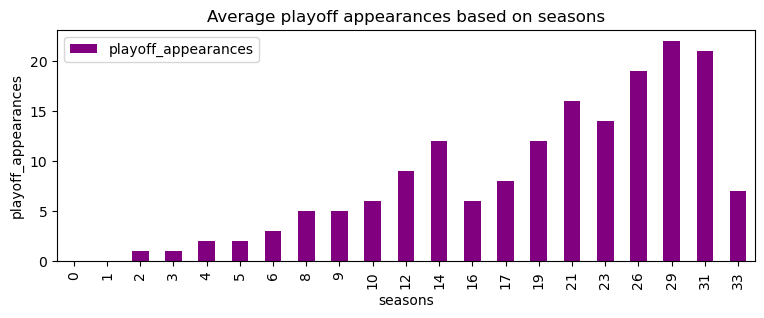

In [43]:
import matplotlib.pyplot as plt
import pandas as pd 

avg_season_appearances_reset = avg_season_appearances.reset_index()

avg_season_appearances_reset.plot(kind="bar", x = "seasons", y= "playoff_appearances", color= "Purple",
                            title="Average playoff appearances based on seasons", figsize=(9,3))
plt.xlabel("seasons")
plt.ylabel("playoff_appearances")
plt.show()
# i used a bar graph here because it showed the average amount of playoff appearances per season under the same owner clearly

This code took the information from the average playoff appearances table. this was necessary for the code because i wanted to see the average playoff appearances throughout the seasons. in my code i had to to reset the index for it to run, which is why there's the line for reseting the index of the average playoof appearances. I chose this as a research question because i thought it would be intersting to see if the amount of seasons played had an effect on avergae play off appearance and from the graph, we can see that the more seasons can lead to higher averages in playoff appearances. 

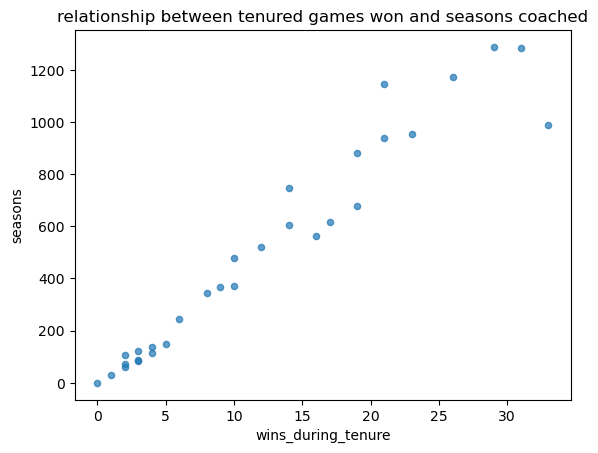

In [51]:
import matplotlib.pyplot as plt
ax = nba_df_2.plot(kind="scatter", alpha = 0.7,
                     title= "relationship between tenured games won and seasons coached", 
                   x = "seasons", y = "wins_during_tenure",
                   legend= False)
plt.xlabel("wins_during_tenure")
plt.ylabel("seasons")
plt.show()

#a scatter plot is the best visuaization for seeing the relationship between two variables

The scatter plot shows the relationship between wins during tenure and seasons. personally , I feel like sctater plots are the easiset to visually understand data. Here we can see that there is a positive relationship ith clusters in the beginnning and the data gets further apart towards the end. This relationship is why i wanted to ask this research question, as most of the data i have found/will find is a positive relationship. My code just set the axes and labeled it. the data frame I pulled the information from was the copy, which only had one column excluded. 

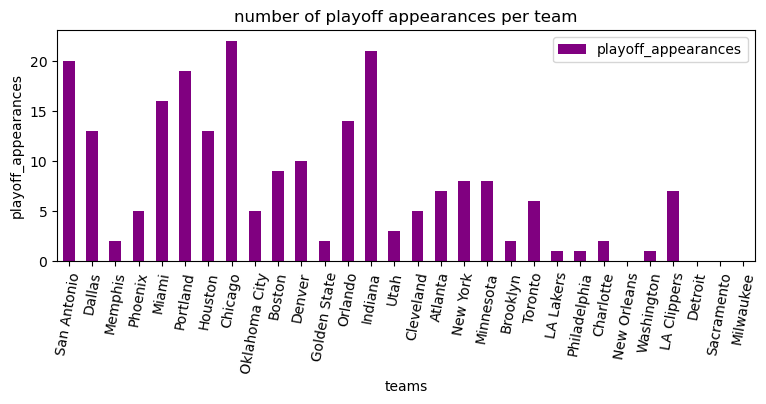

In [9]:
nba_df_2.plot(kind="bar", x = "team", y= "playoff_appearances", color= "Purple",
                            title="number of playoff appearances per team", figsize=(9,3))
plt.xlabel("teams")
plt.xticks(rotation=80)
plt.ylabel("playoff_appearances")
plt.show()

i thught for this case a bar grpah would be the best visualization. it is easy to look at and understand. this graph is depicting the number of playoff appearances per team and with a bar graph, it is easily seen what many teams have how many wins. I wanted to see this relationship becuase I thought it might be able to be used along with other research questions like the relationship between owners and playoff appearances. In my code, i have a line that rotates the x axis labels. this was because without it, the names would overlap and be illegible.

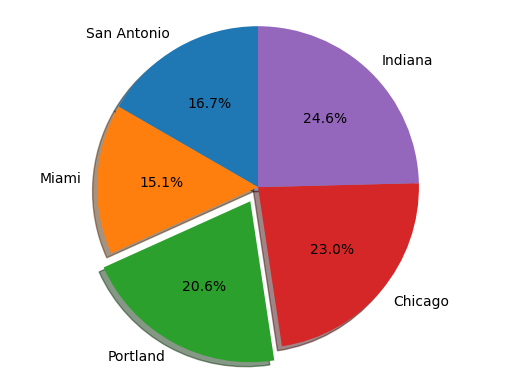

In [37]:
labels = "San Antonio", "Miami","Portland","Chicago", "Indiana"
numbers = [21,19,26,29,31]
explode = (0,0,0.1,0,0)

fig1, ax1 = plt.subplots()
ax1.pie(numbers, explode = explode, labels=labels, autopct = "%1.1f%%", shadow=True, startangle= 90)
ax1.axis("equal")

plt.show()
#add a title 


#the pie chart nicely shows the percentage of the top 5 teams with the most playoff appearances

For this pie chart, I knew I wanted to use the data from my third copy of the datframe, and I thought it would make the most snese ot just insert the values within my code, which is what I did. I exploded one piece of the pie chart so it wouldn't be as boring and have a better visual aid. I wanted to take the top five teams and see their percentage of making the playoffs. As expected, since they are the top 5 teams, they had decently high percentages. 

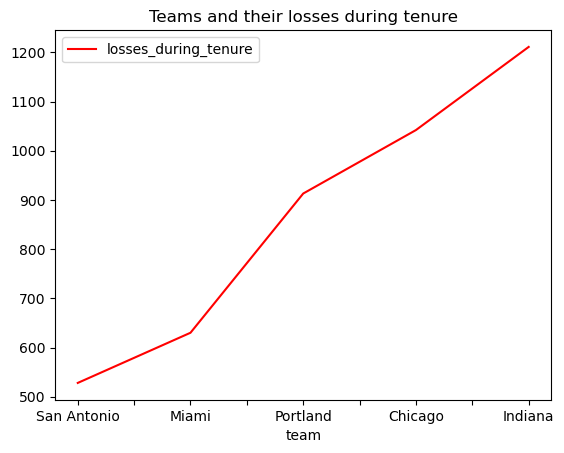

In [26]:
#team and loses during tenure


ax = nba_df_3.plot(title="Teams and their losses during tenure",
                   color = "Red", x = "team", y = "losses_during_tenure")
ax.set_xlabel = "team"
ax.set_ylabel = "losses_during_tenure"
#scatterplot for this one because the big diffenrence between the teams can be seen 

This chart surprised me when the data was computed, as there seemed to be a posotive relationship between the top 5 teams with the most playoff appearances. but the line graph shows the data well which I why I chose it for this research question. since a line graph is the standard for plotting grpahs, i didnt have to state which kind of graph i wanted in my code.

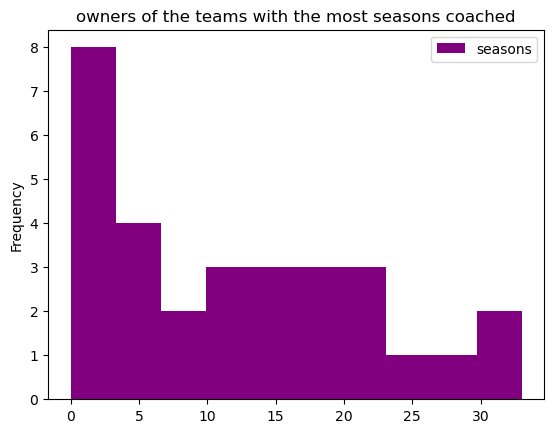

In [7]:
#owners of the teams with the most seasons coached 
ax = nba_df_2.plot(title="frequencey of seasons owned", color = "Purple",
                kind = "hist", x = "owner", y = "seasons")
ax.set_xlabel = "owner"
ax.set_ylabel = "seasons"

#histogram for this one to really see the differnece in frequency of seasons under the same owner 


The histogram nicely shows the frequency of seaons coached under the same owner. So for example 8 teams have had the same owner for 5-0 times. The distribution was really intersting to see. I chose this research question for the distribution because it was different than the other grpahs that were coded. i used the original dataframe for this, and my code sets the axes and labels and then the graph was plotted. With this research question, it can be answered in tandem with research question 3, that yes, consistnecy under the same owner leads to higher playoff appearances.   